<a href="https://colab.research.google.com/github/Enkhzol/diveintocode-ml/blob/master/diver_class_assignment12_binaryClassificationIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Select features and categories for practice**

There are a total of 18 ways to choose, but we will practice with the following combinations. After retrieving the iris data set as in Week 3, extract these from the data frame.

* virgicolor and virginica
* sepal_length and petal_length

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([X, y], axis=1)

df_selected = df.query("Species == [1, 2]").loc[:, ["sepal_length", "petal_length", "Species"]]
display(df_selected.head())
df_selected.describe()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


**[Problem 2] Data analysis**

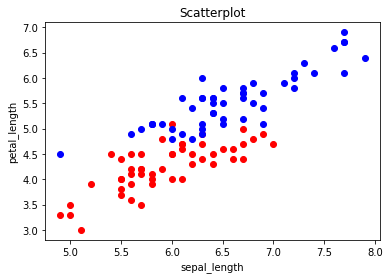

In [5]:
x_0 = df_selected[df_selected.Species == 1].iloc[:, 0]  # sepal with species 1
y_0 = df_selected[df_selected.Species == 1].iloc[:, 1]  # petal with species 1

x_1 = df_selected[df_selected.Species == 2].iloc[:, 0]  # sepal with species 2
y_1 = df_selected[df_selected.Species == 2].iloc[:, 1]  # petal with species 2

fig = plt.figure( figsize=(6,4))
plt.title('Scatterplot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(x_0, y_0, c='red') #species 1
plt.scatter(x_1, y_1, c='blue') #species 2
plt.show()

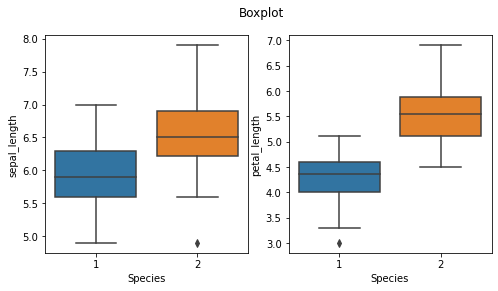

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Boxplot')
sns.boxplot(x='Species', y='sepal_length', data=df_selected, ax=axes[0])
sns.boxplot(x='Species', y='petal_length', data=df_selected, ax=axes[1])
plt.show()

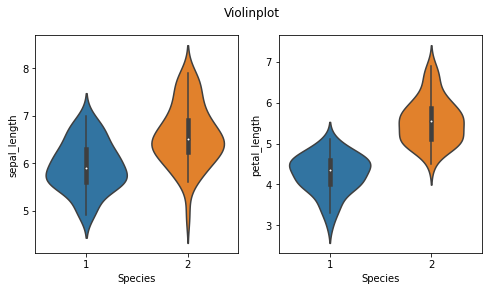

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle('Violinplot')
sns.violinplot(x='Species', y='sepal_length', data=df_selected, ax=axes[0])
sns.violinplot(x='Species', y='petal_length', data=df_selected, ax=axes[1])
plt.show()

**[Problem 3] Division of preprocessing/training data and verification data**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1].values,
                                    df_selected.iloc[:, -1].values,train_size=0.75, random_state=42)

print(f'Traning set / Species: {X_train.shape},{y_train.shape}, Test set/species : {X_test.shape},{y_test.shape}')

Traning set / Species: (75, 2),(75,), Test set/species : (25, 2),(25,)


**[Problem 4] Pretreatment/Standardization**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

**[Problem 5] Learning and estimation**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#init the class
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
# learn
neigh_1.fit(X_train_transformed, y_train)
neigh_3.fit(X_train_transformed, y_train)
neigh_5.fit(X_train_transformed, y_train)
# predict
y_pred_neigh_1 = neigh_1.predict(X_test_transformed)
y_pred_neigh_3 = neigh_3.predict(X_test_transformed)
y_pred_neigh_5 = neigh_5.predict(X_test_transformed)

print('1-nn estimates the validation data :{}'.format(y_pred_neigh_1))
print('3-nn estimates the validation data:{}'.format(y_pred_neigh_3))
print('5-nn estimates the validation data:{}'.format(y_pred_neigh_5))

1-nn estimates the validation data :[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3-nn estimates the validation data:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5-nn estimates the validation data:[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


**[Problem 6] Evaluation**

In [12]:
from sklearn import metrics 

def evaluate(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)    
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, confusion

In [13]:
print('\t1-nn')
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_1)))
print('===================')
print('\t3-nn')
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_3)))
print('===================')
print('\t5-nn')
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_5)))

	1-nn
accuracy : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
	3-nn
accuracy : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
	5-nn
accuracy : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


Display the confusion matrix using scikit-learn

Confusion matrix
[[12  2]
 [ 3  8]]


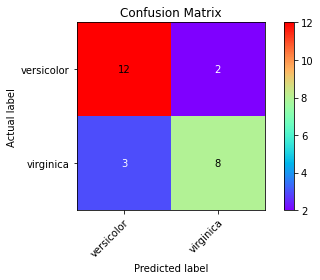

In [14]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,):
    """
    This function prints and plots the confusion matrix..
    """
    cmap=plt.cm.rainbow
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    print('Confusion matrix')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='Actual label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # create text inside
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "white")
    fig.tight_layout()
    return ax


plot_confusion_matrix(y_test, y_pred_neigh_1, classes=iris.target_names)
plt.show()

**[Problem 7] Visualization**

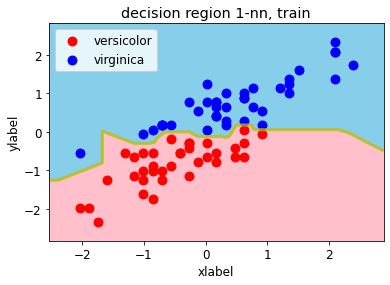

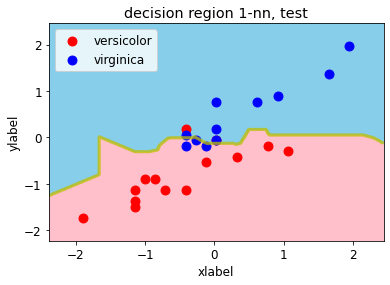

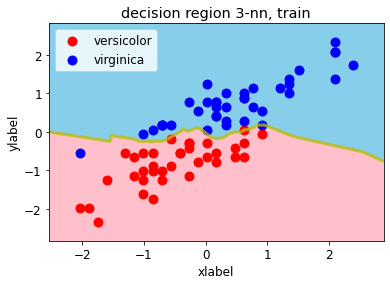

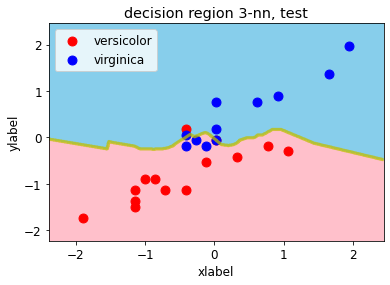

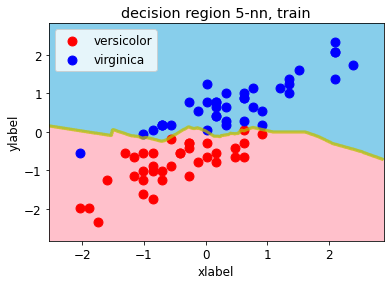

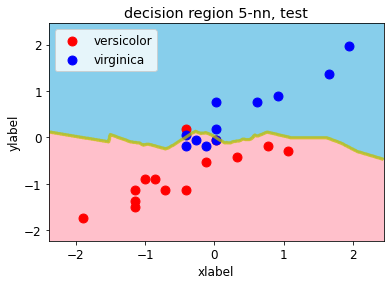

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.rcParams['font.size'] = 12
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models = [neigh_1, neigh_3, neigh_5]
model_names = ['1-nn', '3-nn', '5-nn']

for model, model_names in zip(models, model_names):
    decision_region(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_names, 'train'))
    decision_region(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_names, 'test'))

**[Problem 8] Learning by other methods**


Learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values in one table. Take a brief look at the results using that table and decision area. Please state which method was good for which index value and what kind of decision area it was.


* Nearest neighbor method
* Logistic regression
* SVM
* Decision tree
* Random forest

The link to the official documentation is below. Each of them has its own arguments (hyperparameters) to be adjusted, but we will not cover them in this assignment. Please run the program with the default values first.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


	MODEL: Logistic Regression:
- accuracy : 0.84
- precision : 0.8571428571428571
- recall : 0.8571428571428571
- f1 : 0.8571428571428571
- confusion matrix
[[12  2]
 [ 2  9]]


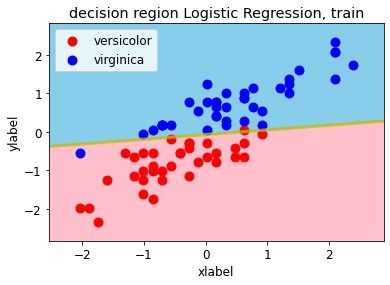

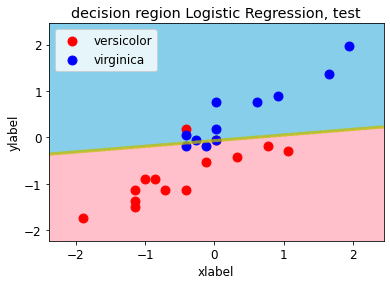

	MODEL: SVM:
- accuracy : 0.84
- precision : 0.8571428571428571
- recall : 0.8571428571428571
- f1 : 0.8571428571428571
- confusion matrix
[[12  2]
 [ 2  9]]


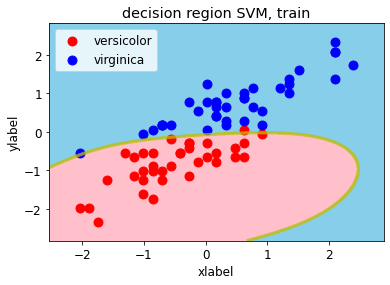

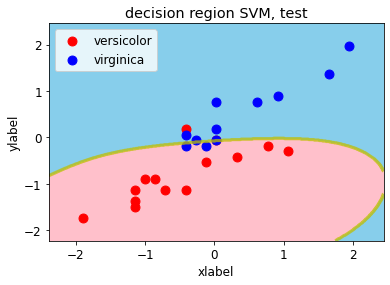

	MODEL: Decision Tree:
- accuracy : 0.84
- precision : 0.8125
- recall : 0.9285714285714286
- f1 : 0.8666666666666666
- confusion matrix
[[13  1]
 [ 3  8]]


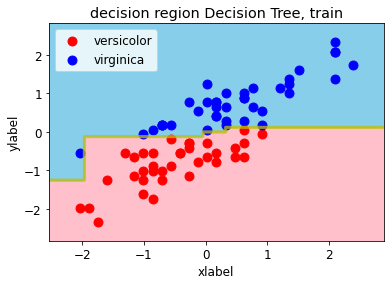

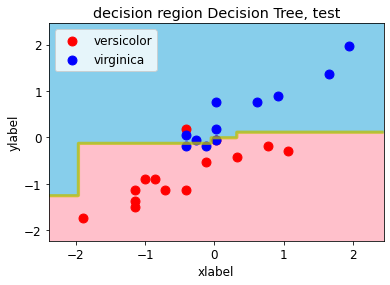

	MODEL: Random Forest:
- accuracy : 0.84
- precision : 0.8125
- recall : 0.9285714285714286
- f1 : 0.8666666666666666
- confusion matrix
[[13  1]
 [ 3  8]]


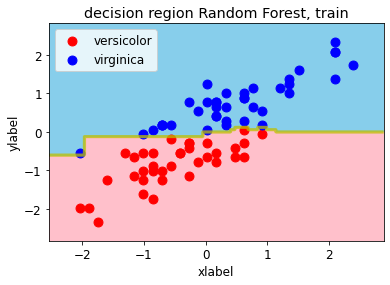

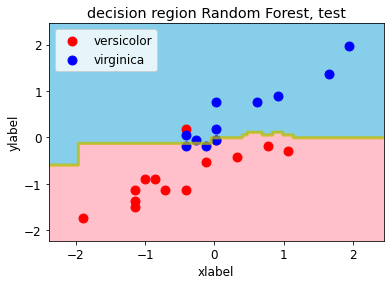

In [21]:
logistic_reg = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


models = [logistic_reg, svc, tree, random_forest]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
for model, model_name in zip(models, model_names):
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    print('\tMODEL: {}:\n- accuracy : {}\n- precision : {}\n- recall : {}\n- f1 : {}\n- confusion matrix\n{}'.format(model_name,*evaluate(y_test, y_pred)))
    decision_region(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

**[Problem 9] (Advanced task) Comparison with and without standardization**

	without standardization
	MODEL: 1-nn:
- accuracy : 0.8
- precision : 0.8
- recall : 0.8571428571428571
- f1 : 0.8275862068965518
- confusion matrix
[[12  2]
 [ 3  8]]


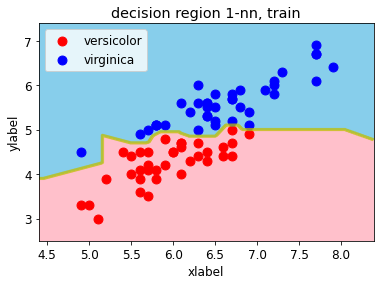

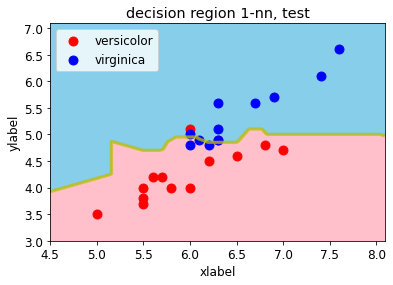

	without standardization
	MODEL: 3-nn:
- accuracy : 0.8
- precision : 0.8
- recall : 0.8571428571428571
- f1 : 0.8275862068965518
- confusion matrix
[[12  2]
 [ 3  8]]


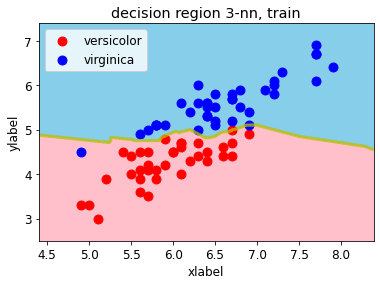

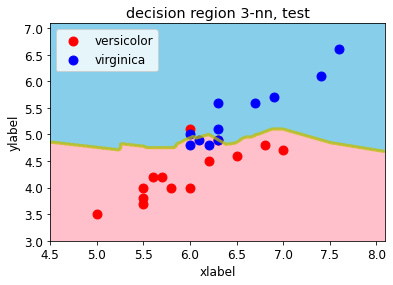

	without standardization
	MODEL: 5-nn:
- accuracy : 0.8
- precision : 0.7647058823529411
- recall : 0.9285714285714286
- f1 : 0.8387096774193549
- confusion matrix
[[13  1]
 [ 4  7]]


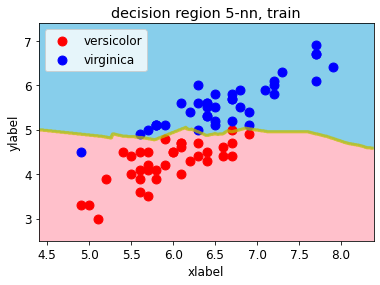

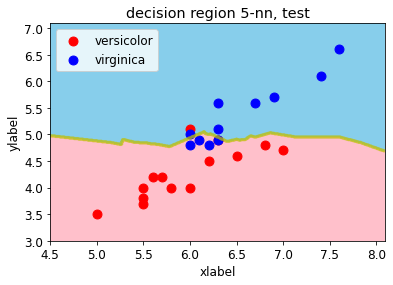

	without standardization
	MODEL: Logistic Regression:
- accuracy : 0.84
- precision : 0.8571428571428571
- recall : 0.8571428571428571
- f1 : 0.8571428571428571
- confusion matrix
[[12  2]
 [ 2  9]]


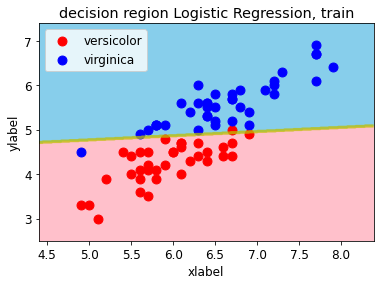

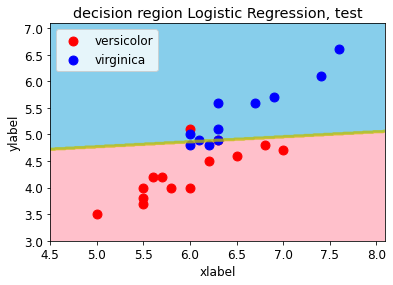

	without standardization
	MODEL: SVM:
- accuracy : 0.84
- precision : 0.8571428571428571
- recall : 0.8571428571428571
- f1 : 0.8571428571428571
- confusion matrix
[[12  2]
 [ 2  9]]


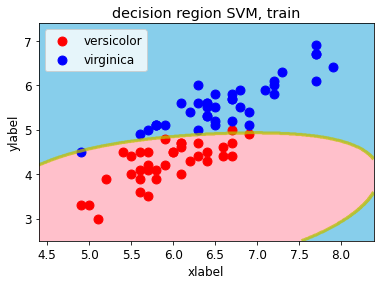

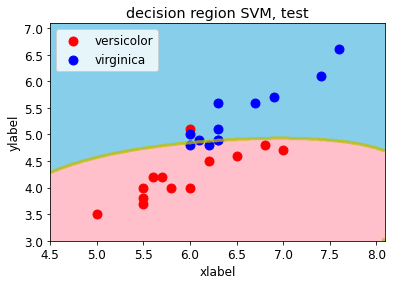

	without standardization
	MODEL: Decision Tree:
- accuracy : 0.84
- precision : 0.8125
- recall : 0.9285714285714286
- f1 : 0.8666666666666666
- confusion matrix
[[13  1]
 [ 3  8]]


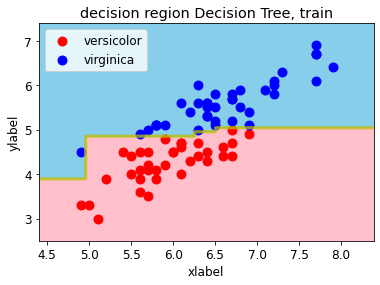

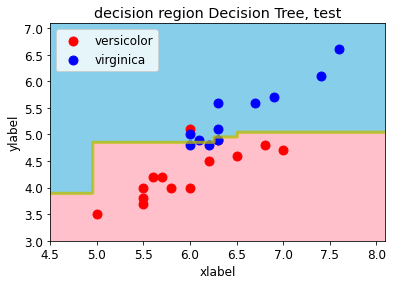

	without standardization
	MODEL: Random Forest:
- accuracy : 0.84
- precision : 0.8125
- recall : 0.9285714285714286
- f1 : 0.8666666666666666
- confusion matrix
[[13  1]
 [ 3  8]]


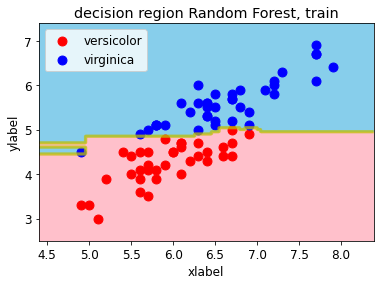

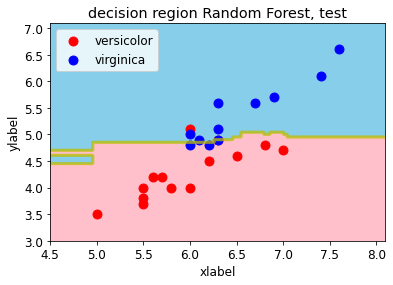

In [22]:
models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ['1-nn', '3-nn', '5-nn', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

for model, model_name in zip(models, model_names):
    print('\twithout standardization')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\tMODEL: {}:\n- accuracy : {}\n- precision : {}\n- recall : {}\n- f1 : {}\n- confusion matrix\n{}'.format(model_name,*evaluate(y_test, y_pred)))
    decision_region(X_train, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region(X_test, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

**[Problem 10] (Advance assignment) Highly accurate method using all objective variables**

In [23]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=['Species'])
df = pd.concat([X, y], axis=1)

df_selected = df.loc[:, ["sepal_length", "petal_length", "Species"]]

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.iloc[:, -1], test_size=0.25, random_state=42)

print('X_train.shape : {}, X_test.shape : {}'.format(X_train.shape, X_test.shape))

scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

X_train.shape : (112, 2), X_test.shape : (38, 2)


In [24]:
def decision_region_3dim(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    # setting
    scatter_color = ['green', 'red', 'blue']  
    contourf_color = ['lightgreen', 'pink', 'skyblue']  
    n_class = 3 
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.rcParams['font.size'] = 12
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def evaluate_multi(y_true, y_pred, average='macro'):
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average=average)
    recall = metrics.recall_score(y_test, y_pred, average=average)
    f1 = metrics.f1_score(y_test, y_pred, average=average)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

1-nn
----with standard scaling----
acc : 0.8947368421052632
precision : 0.8897435897435897
recall : 0.8863636363636364
f1 : 0.8838383838383838
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]


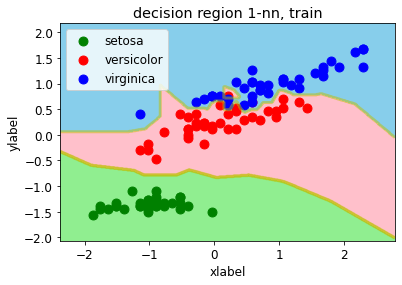

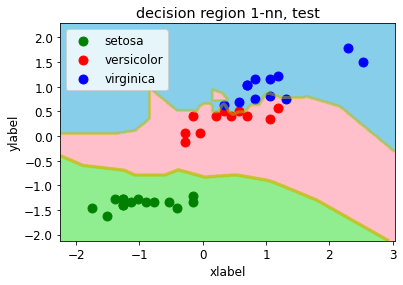

----without standard scaling----
acc : 0.8947368421052632
precision : 0.8897435897435897
recall : 0.8863636363636364
f1 : 0.8838383838383838
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]


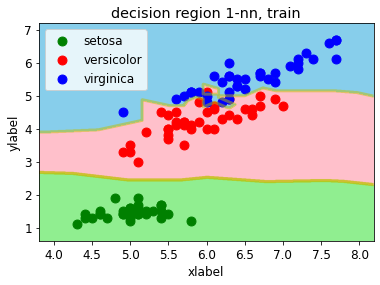

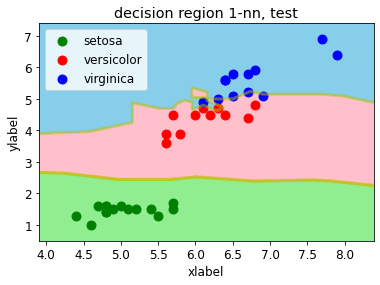

3-nn
----with standard scaling----
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


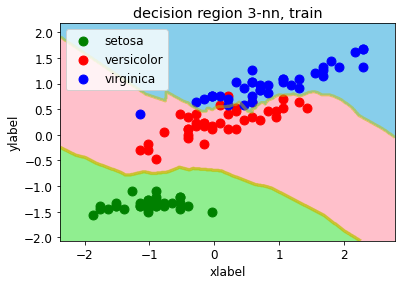

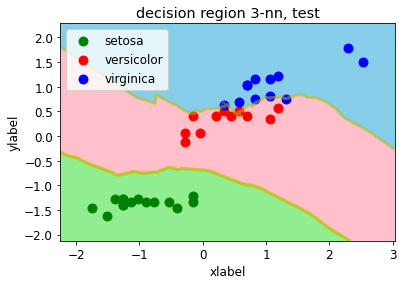

----without standard scaling----
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


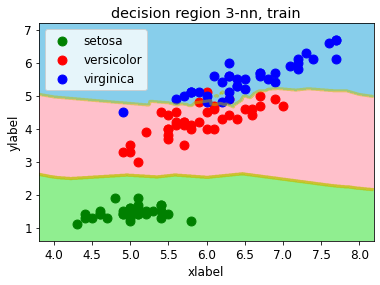

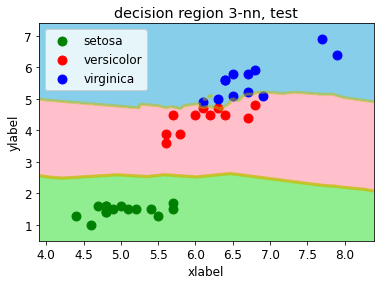

5-nn
----with standard scaling----
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
 confusion matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


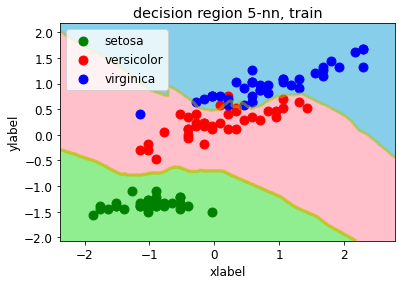

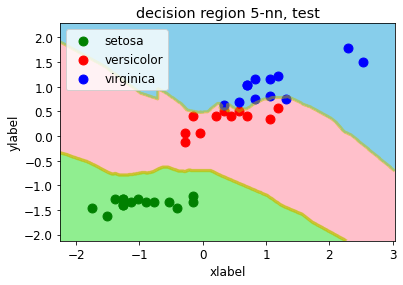

----without standard scaling----
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


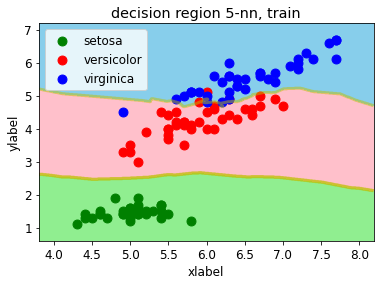

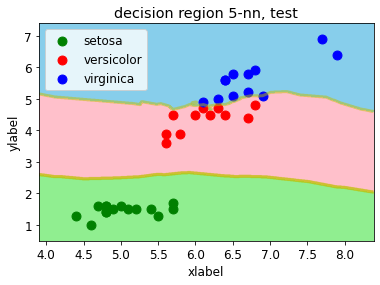

Logistic Regression
----with standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


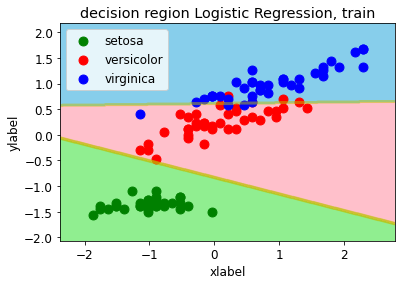

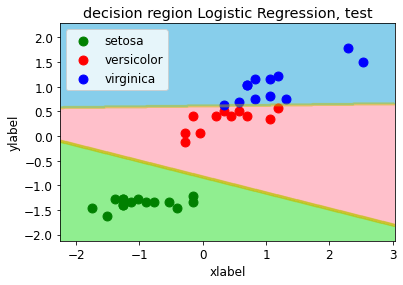

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


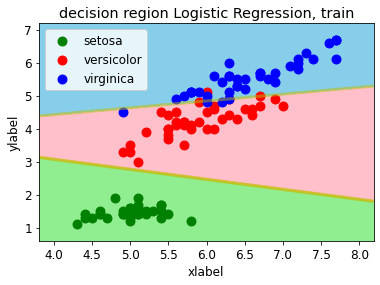

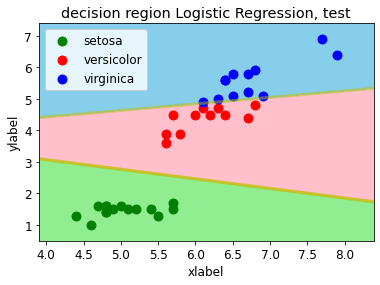

SVM
----with standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


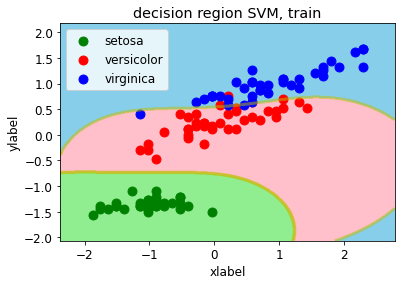

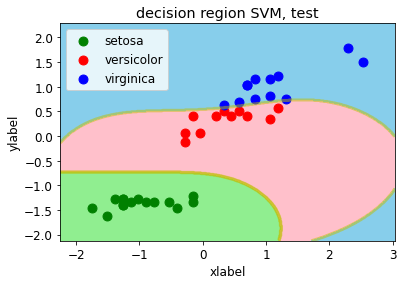

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


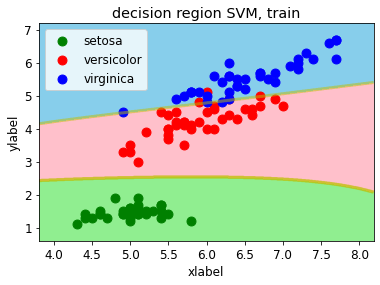

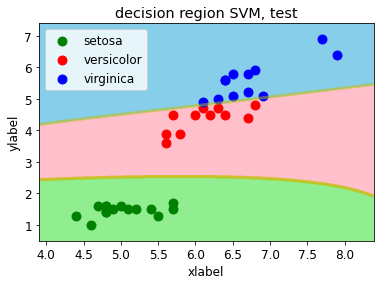

Decision Tree
----with standard scaling----
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


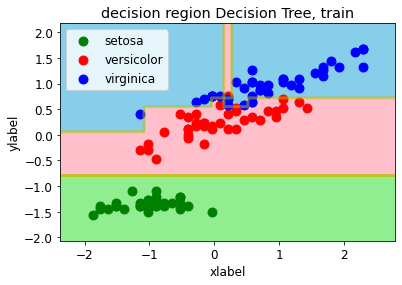

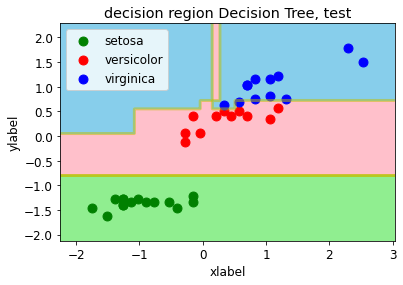

----without standard scaling----
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


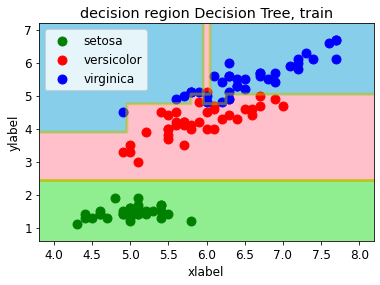

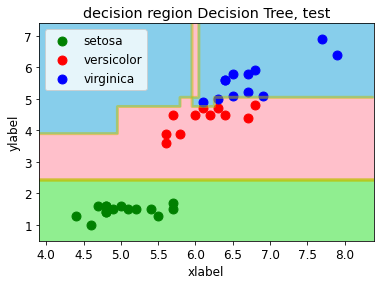

Random Forest
----with standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


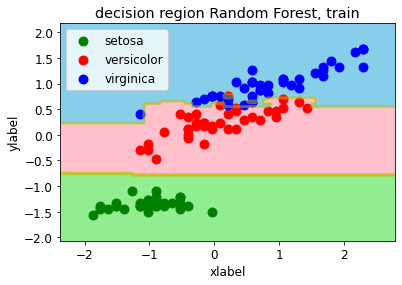

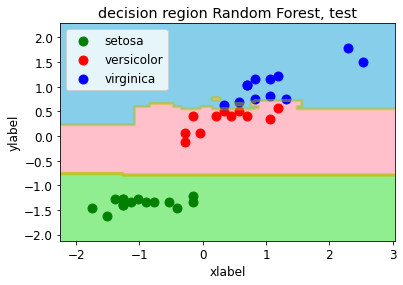

----without standard scaling----
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
 confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


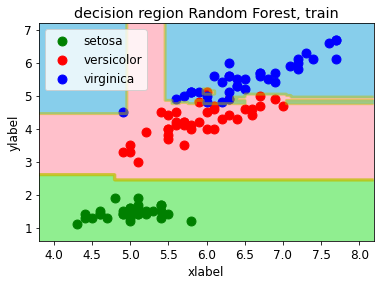

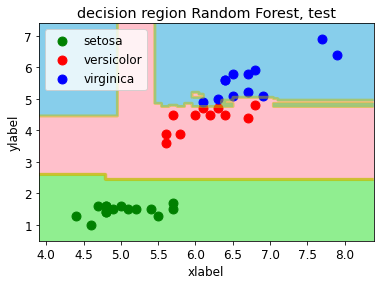

In [25]:
X_train_ndarray = np.array(X_train)
X_test_ndarray = np.array(X_test)

models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ['1-nn', '3-nn', '5-nn', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

for model, model_name in zip(models, model_names):
    print(model_name)

    print('----with standard scaling----')
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate_multi(y_test, y_pred)))
    decision_region_3dim(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region_3dim(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))

    print('----without standard scaling----')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\n confusion matrix\n{}'.format(*evaluate_multi(y_test, y_pred)))
    decision_region_3dim(X_train_ndarray, y_train, model, title='decision region {}, {}'.format(model_name, 'train'))
    decision_region_3dim(X_test_ndarray, y_test, model, title='decision region {}, {}'.format(model_name, 'test'))